WeatherPy Analysis:

- As would be obvously hypothesized, "Max Temp" becomes increasingly high as we approach the equator which sits at 0 Deg. Latitude). It is clear that due to the time of year the temperatures seriously drop off the further you go into the northern hemisphere.

- There seems to be no real correlation found between latitude and cloudiness but it is interesting to see how many cities there are with zero cloudiness. 

- There is not much we can tell from the latitude vs. wind speed figure however this does give us an idea of what an interesting question may be to ask. What are the windiest parts of the world based on longitude and latitude. We can see that there are clusters with higher wind speeds. We could possibly cities by wind speed in a certain range and map the windiest cities/windiest regions of the world.

In [77]:
#Importing main dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#importing apikey from config file
from config import api_key

#importing citipy module to determine city based on lats and longs
from citipy import citipy

#Output File as (CSV)
output_data_file = "output_data/cities.csv"

#range of lats and longs
lat_range = (-90, 90)
lng_range = (-180, 180)



In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print length of cities list
len(cities)


588

In [82]:
name = [] 
lat = []
long = []
max_temp = []
wind_speed = []
clouds = []
humidity = []
date = []
country = [] 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = 'Imperial' 

print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1


for city in cities:
        try:
            print(f"Processing record #{record_count} for: {city}...") 
            query = url + "&q=" + city 
            response = requests.get(query).json()
            name.append(response['name'])
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            clouds.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            country.append(response['sys']['country'])
            date.append(response['dt']) 
            record_count += 1 
        except KeyError:  
            print(f"City not found moving to next city...")
            record_count += 1    

Beginning Data Retrieval     
-----------------------------
Processing record #1 for: cape town...
Processing record #2 for: saint george...
Processing record #3 for: ushuaia...
Processing record #4 for: atuona...
Processing record #5 for: harper...
Processing record #6 for: pangnirtung...
Processing record #7 for: sindor...
Processing record #8 for: nizhneyansk...
City not found moving to next city...
Processing record #9 for: rikitea...
Processing record #10 for: severo-kurilsk...
Processing record #11 for: saint-philippe...
Processing record #12 for: arraial do cabo...
Processing record #13 for: santa isabel...
Processing record #14 for: kodiak...
Processing record #15 for: shelburne...
Processing record #16 for: qaanaaq...
Processing record #17 for: butaritari...
Processing record #18 for: punta arenas...
Processing record #19 for: busselton...
Processing record #20 for: buala...
Processing record #21 for: katsuura...
Processing record #22 for: hilo...
Processing record #23 for: ba

Processing record #185 for: polczyn-zdroj...
Processing record #186 for: pangody...
Processing record #187 for: port alfred...
Processing record #188 for: tadine...
Processing record #189 for: akyab...
City not found moving to next city...
Processing record #190 for: pevek...
Processing record #191 for: vanavara...
Processing record #192 for: lexington...
Processing record #193 for: khonuu...
City not found moving to next city...
Processing record #194 for: birao...
Processing record #195 for: tual...
Processing record #196 for: delta del tigre...
Processing record #197 for: souillac...
Processing record #198 for: vila velha...
Processing record #199 for: rio grande...
Processing record #200 for: mogadishu...
Processing record #201 for: colwyn bay...
Processing record #202 for: constitucion...
Processing record #203 for: sorland...
Processing record #204 for: sindou...
Processing record #205 for: ordu...
Processing record #206 for: tiksi...
Processing record #207 for: general pico...
P

Processing record #373 for: kalmunai...
Processing record #374 for: valdivia...
Processing record #375 for: hami...
Processing record #376 for: sailana...
Processing record #377 for: ascension...
City not found moving to next city...
Processing record #378 for: chaihe...
Processing record #379 for: cap malheureux...
Processing record #380 for: masjed-e soleyman...
City not found moving to next city...
Processing record #381 for: panama city...
Processing record #382 for: kahului...
Processing record #383 for: marawi...
Processing record #384 for: dolores...
Processing record #385 for: brockville...
Processing record #386 for: kirakira...
Processing record #387 for: serebryansk...
Processing record #388 for: virginia beach...
Processing record #389 for: lolua...
City not found moving to next city...
Processing record #390 for: rousinov...
Processing record #391 for: lorengau...
Processing record #392 for: ponta delgada...
Processing record #393 for: costa rica...
Processing record #394 

Processing record #554 for: kailua...
Processing record #555 for: buta...
Processing record #556 for: mitsamiouli...
Processing record #557 for: cuamba...
Processing record #558 for: panaba...
Processing record #559 for: daxian...
City not found moving to next city...
Processing record #560 for: tubruq...
City not found moving to next city...
Processing record #561 for: hobyo...
Processing record #562 for: chagda...
City not found moving to next city...
Processing record #563 for: cascais...
Processing record #564 for: praxedis guerrero...
Processing record #565 for: kotelnich...
Processing record #566 for: adamovka...
Processing record #567 for: nizhnevartovsk...
Processing record #568 for: nerchinskiy zavod...
Processing record #569 for: zhigansk...
Processing record #570 for: rocha...
Processing record #571 for: manyana...
Processing record #572 for: doctor pedro p. pena...
City not found moving to next city...
Processing record #573 for: qax...
Processing record #574 for: puerto ca

In [83]:

cities_weather_df = pd.DataFrame({"Cities": name, 
                                  "Cloudiness": clouds, 
                                  "Country": country, 
                                  "Date": date,
                                  "Humidity": humidity, 
                                  "Lat": lat, "Lng": long, 
                                  "Max Temp": max_temp, 
                                  "Wind Speed": wind_speed})



In [85]:
cities_weather_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,0,ZA,1541181600,63,-33.93,18.42,64.40,12.75
1,Saint George,0,GR,1541181000,93,39.45,22.34,60.80,3.15
2,Ushuaia,75,AR,1541181600,43,-54.81,-68.31,51.80,17.22
3,Atuona,0,PF,1541185150,100,-9.80,-139.03,80.78,11.99
4,Harper,1,US,1541182500,34,30.30,-99.24,68.90,10.29


In [87]:
cities_weather_df.to_csv('WeatherDataNov2.csv')


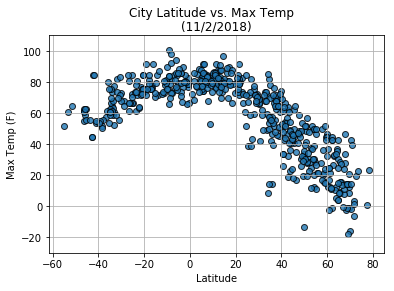

In [101]:
plt.scatter(cities_weather_df['Lat'], cities_weather_df['Max Temp'],
            edgecolors='black',marker='o', alpha=0.8)
plt.suptitle('City Latitude vs. Max Temp') 
plt.title('(11/2/2018)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(-30, 110)
plt.savefig('City_Lat_vs_Max_Temp.png')
 

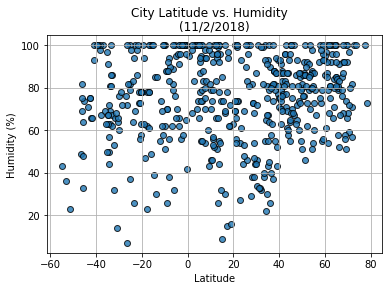

In [100]:
plt.scatter(cities_weather_df['Lat'], cities_weather_df['Humidity'],
            edgecolors='black',marker='o', alpha=0.8)
plt.suptitle('City Latitude vs. Humidity') 
plt.title('(11/2/2018)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('City_Latitude_vs_Humidity.png')


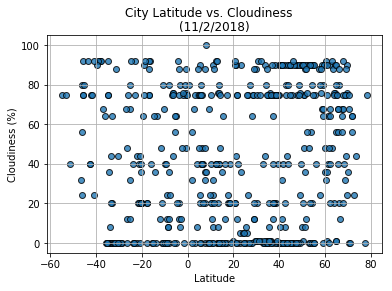

In [102]:
plt.scatter(cities_weather_df['Lat'], cities_weather_df['Cloudiness'],
            edgecolors='black',marker='o', alpha=0.8)
plt.suptitle('City Latitude vs. Cloudiness') 
plt.title('(11/2/2018)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('City_Latitude_vs_Cloudiness.png')

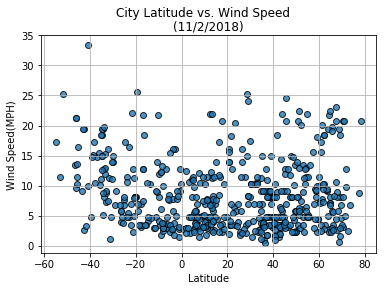

In [103]:
plt.scatter(cities_weather_df['Lat'], cities_weather_df['Wind Speed'],
            edgecolors='black',marker='o', alpha=0.8)
plt.suptitle('City Latitude vs. Wind Speed') 
plt.title('(11/2/2018)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.savefig('City_Latitude_vs_Windspeed.png')